<h1 style="color:violet;">Analysing Movie Budget and Revenue Data</h1>

<p style="color:smokewhite; font-size:20px;">Do higher film budgets lead to more revenue in the box office? In other words, should a movie studio spend more on a film to make more? </p>

<h3 style="color:violet;"><em>Import the needed packages</em></h3>

In [71]:
import pandas as pd
import numpy as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

<h3 style="color:violet;"><em>Loading the datasets</em></h3>

In [2]:
movie_df = pd.read_csv("Data/cost_revenue_dirty.csv")

<h3 style="color:violet;"><em>Explorations</em></h3>

In [3]:
movie_df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [5]:
movie_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,5391.0,2696.0,1556.391981,1.0,1348.5,2696.0,4043.5,5391.0


In [6]:
movie_df.isna().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [7]:
movie_df.duplicated().sum()

0

In [8]:
movie_df.loc[:, ["USD_Domestic_Gross", "USD_Worldwide_Gross", "USD_Production_Budget"]] = movie_df.loc[:, ["USD_Domestic_Gross", "USD_Worldwide_Gross", "USD_Production_Budget"]].apply(lambda x: x.str.replace('$', "").str.replace(",", ""))

In [9]:
movie_df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


In [10]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [11]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [12]:
movie_df["USD_Domestic_Gross"] = movie_df["USD_Domestic_Gross"].astype("int64")
movie_df["USD_Production_Budget"] = movie_df["USD_Production_Budget"].astype("int64")
movie_df["USD_Worldwide_Gross"] = movie_df["USD_Worldwide_Gross"].astype("int64")

In [13]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


In [14]:
movie_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,5391.0,2.696000e+03,1.556392e+03,1.0,1348.5,2696.0,4043.5,5.391000e+03
USD_Production_Budget,5391.0,3.111374e+07,4.052380e+07,1100.0,5000000.0,17000000.0,40000000.0,4.250000e+08
USD_Worldwide_Gross,5391.0,8.885542e+07,1.684578e+08,0.0,3865206.0,27450453.0,96454455.0,2.783919e+09
USD_Domestic_Gross,5391.0,4.123552e+07,6.602935e+07,0.0,1330901.5,17192205.0,52343687.0,9.366622e+08


In [15]:
movie_df["Release_Date"] = pd.to_datetime(movie_df['Release_Date'])

In [16]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


<h4 style="color:smokewhite;">What is the average Production Budget?</h4>

In [18]:
movie_df['USD_Production_Budget'].mean()

31113737.57837136

<h4 style="color:smokewhite;">What is the average Worldwide Gross Revenue?</h4>

In [19]:
movie_df['USD_Worldwide_Gross'].mean()

88855421.96271564

<h4 style="color:smokewhite;">What were the minimums for worldwide and Domestic  Budget</h4>

In [20]:
movie_df[["USD_Worldwide_Gross", "USD_Domestic_Gross"]].min()

USD_Worldwide_Gross    0
USD_Domestic_Gross     0
dtype: int64

<h4 style="color:smokewhite;">How many films grossed $0 domestically?</h4>

In [21]:
len(movie_df[movie_df["USD_Domestic_Gross"]==0])

512

<h4>What were the highest budget films that grossed nothing?</h4>

In [22]:
movie_df[(movie_df['USD_Production_Budget']==movie_df['USD_Production_Budget'].max()) & (movie_df['USD_Domestic_Gross']==0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


<h4>How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally (i.e., the biggest flops)?</h4>

In [24]:
movie_df[movie_df['USD_Worldwide_Gross']==0].sort_values("USD_Production_Budget", ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [25]:
movie_df.query("USD_Worldwide_Gross !=0 and USD_Domestic_Gross==0")

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [31]:
not_released_yet = movie_df.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross == 0 and Release_Date >='2018-05-01'")
not_released_yet

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [32]:
clean_data = movie_df.drop(index=not_released_yet.index)

In [36]:
money_losing_film = clean_data.query("USD_Production_Budget > USD_Worldwide_Gross")
money_losing_film

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


In [39]:
(money_losing_film.shape[0] /clean_data.shape[0]) * 100

37.27711738484398

<h3 style="color:violet;"><em>Visualising with seaborn</em></h3>

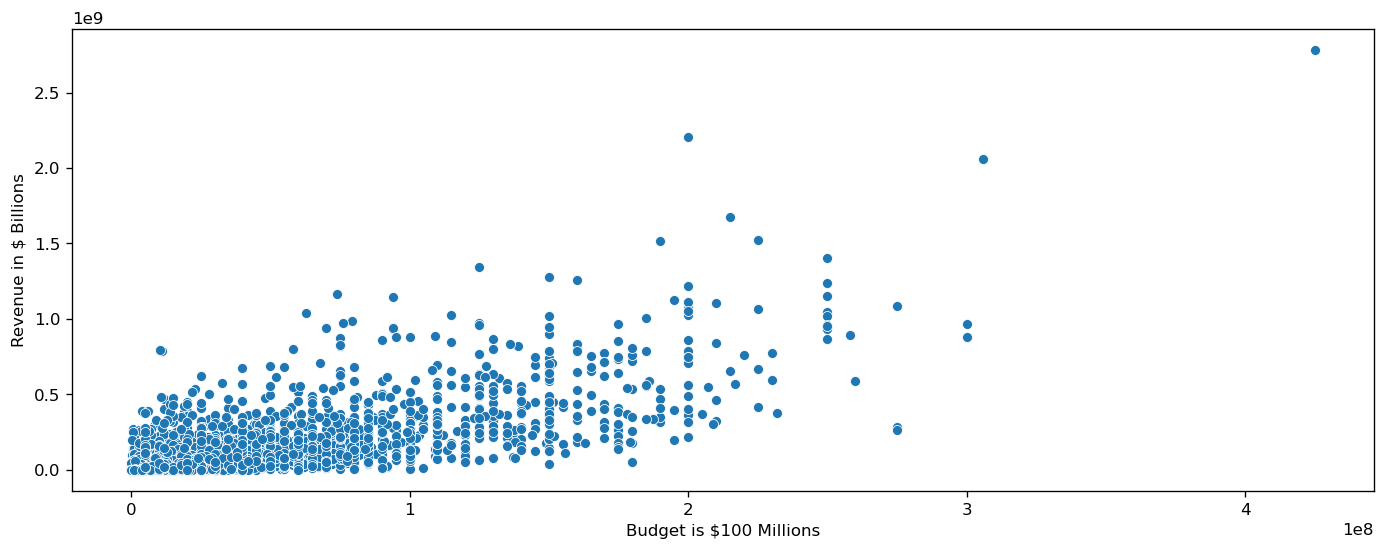

In [43]:
plt.figure(figsize=(14, 5), dpi=120)
ax = sns.scatterplot(data=clean_data, x="USD_Production_Budget", y="USD_Worldwide_Gross")
ax.set(ylabel="Revenue in $ Billions", xlabel="Budget is $100 Millions");

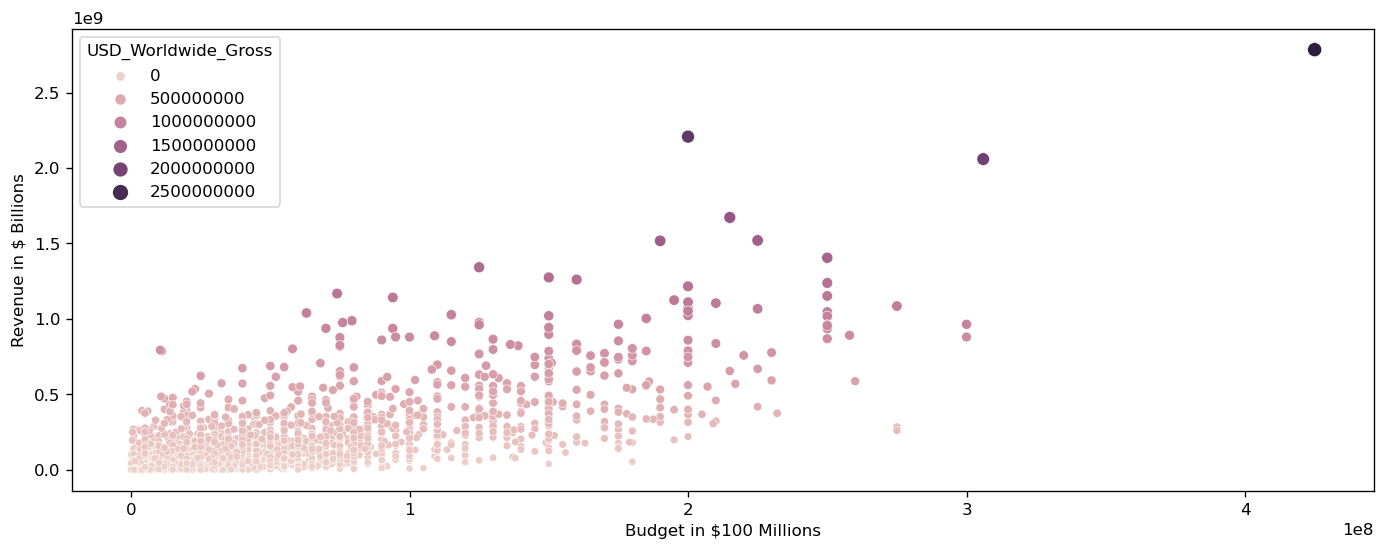

In [45]:
plt.figure(figsize=(14, 5), dpi=120)
ax = sns.scatterplot(
    data=clean_data,
    x="USD_Production_Budget",
    y="USD_Worldwide_Gross",
    hue="USD_Worldwide_Gross",
    size="USD_Worldwide_Gross"
)
ax.set(
  xlabel ="Budget in $100 Millions",
  ylabel = "Revenue in $ Billions"
 );

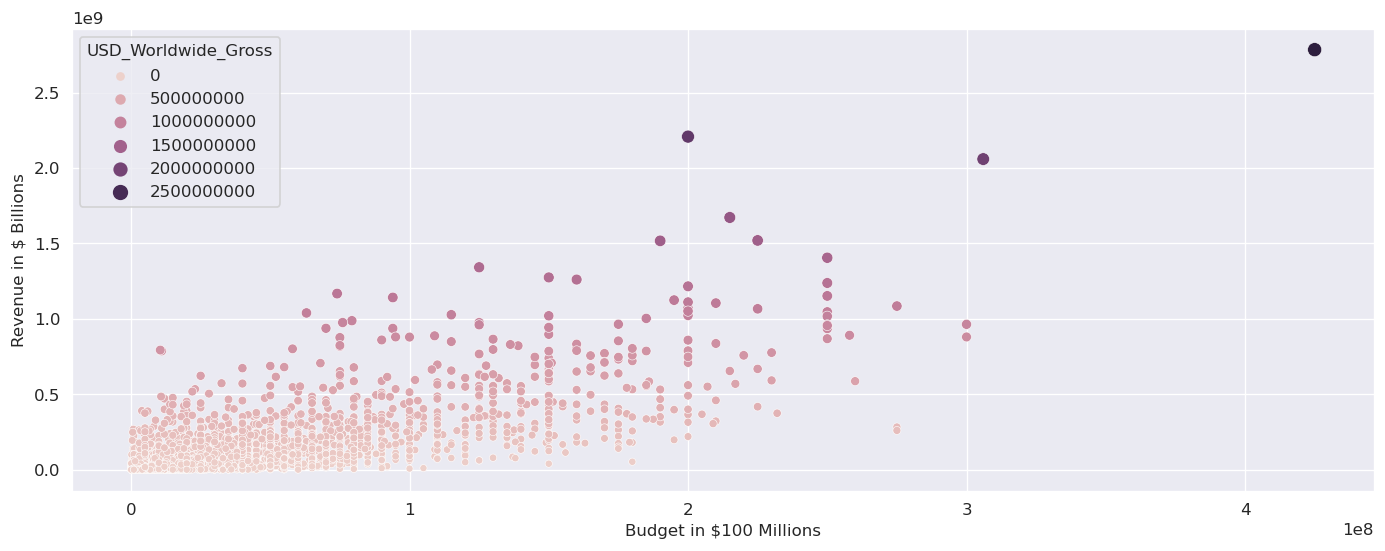

In [47]:
plt.figure(figsize=(14, 5), dpi=120)
with sns.axes_style("darkgrid"):
     ax = sns.scatterplot(data=clean_data,
                          x="USD_Production_Budget",
                          y="USD_Worldwide_Gross",
                          hue="USD_Worldwide_Gross", 
                          size="USD_Worldwide_Gross")
     ax.set(
          xlabel="Budget in $100 Millions",
          ylabel= "Revenue in $ Billions"
     );

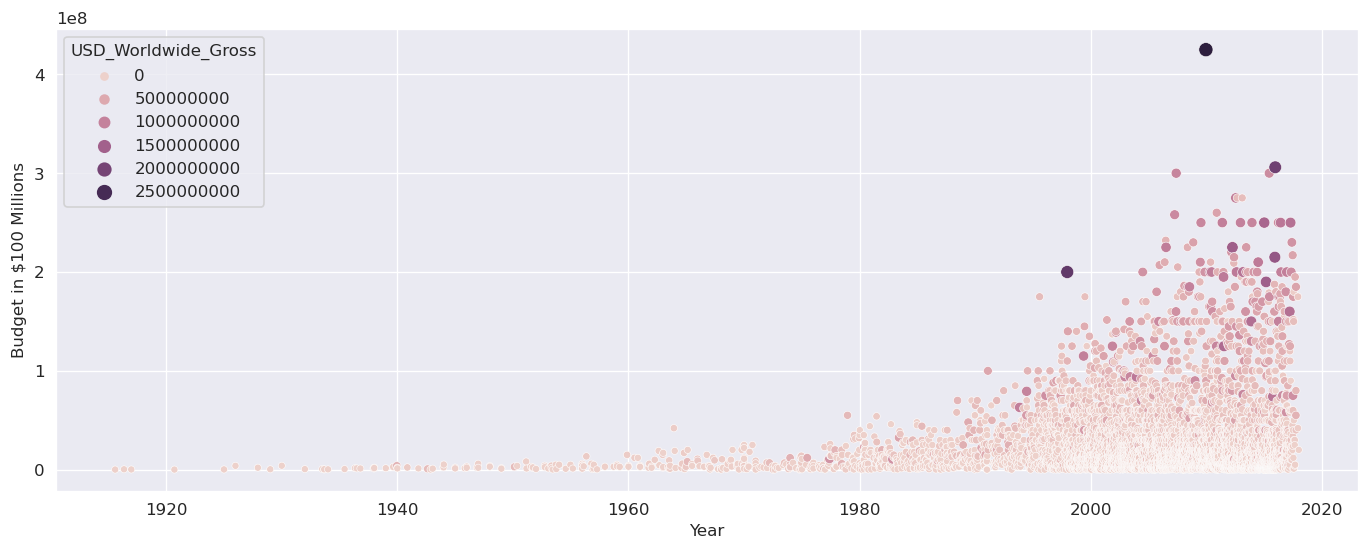

In [49]:
plt.figure(figsize=(14, 5), dpi=120)
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=clean_data,
                         x="Release_Date",
                         y="USD_Production_Budget",
                         hue="USD_Worldwide_Gross",
                         size="USD_Worldwide_Gross")
    ax.set(
        xlabel="Year",
        ylabel="Budget in $100 Millions"
    );

In [50]:
datetime_index = pd.DatetimeIndex(clean_data['Release_Date'])
datetime_index

DatetimeIndex(['1915-08-02', '1916-05-09', '1916-12-24', '1920-09-17',
               '1925-01-01', '1925-12-30', '1927-12-08', '1929-01-02',
               '1930-01-01', '1931-12-31',
               ...
               '2017-08-25', '2017-09-06', '2017-09-06', '2017-10-02',
               '2017-10-02', '2017-10-02', '2017-10-03', '2017-12-05',
               '2017-12-05', '2017-12-31'],
              dtype='datetime64[ns]', name='Release_Date', length=5384, freq=None)

In [53]:
decade= datetime_index.year//10*10

In [54]:
clean_data.loc[:, 'Decade'] =decade

In [55]:
clean_data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


In [58]:
old_film = clean_data[clean_data['Decade']<1970]
old_film

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000,1960


In [59]:
new_film = clean_data[clean_data['Decade']>=1970]
new_film

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


In [60]:
old_film['USD_Production_Budget'].max()

42000000

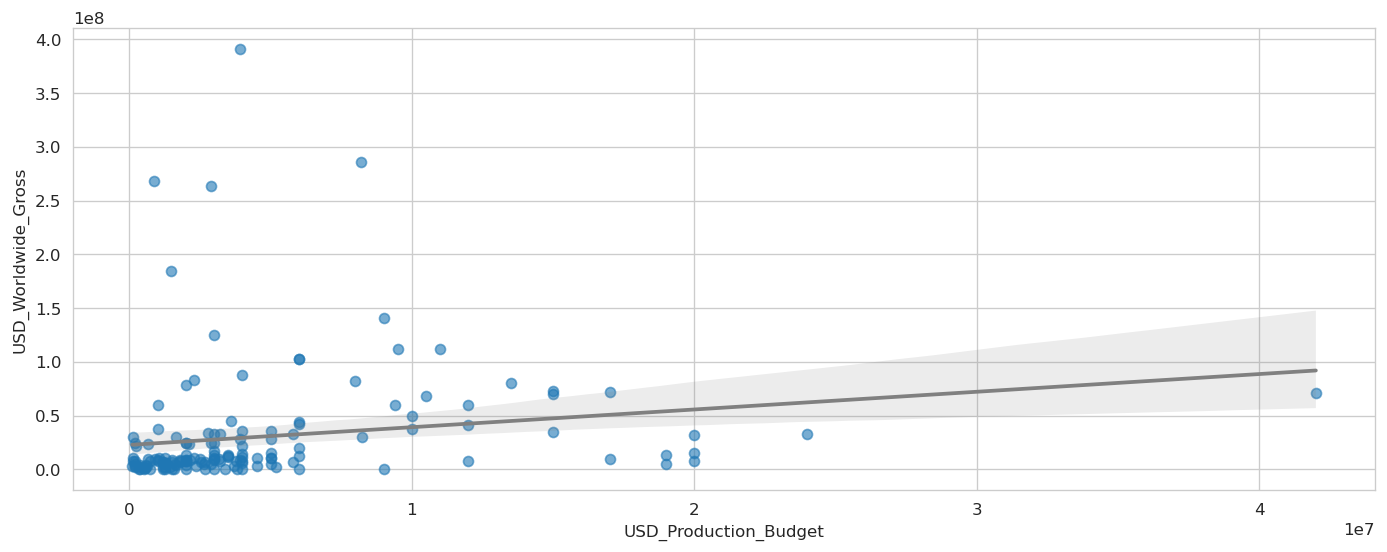

In [64]:
plt.figure(figsize=(14, 5),  dpi=120)
with sns.axes_style("whitegrid"):
    ax = sns.regplot(data=old_film,
                     x="USD_Production_Budget",
                     y="USD_Worldwide_Gross",
                     scatter_kws={"alpha":0.6},
                     line_kws={'color':'gray'});

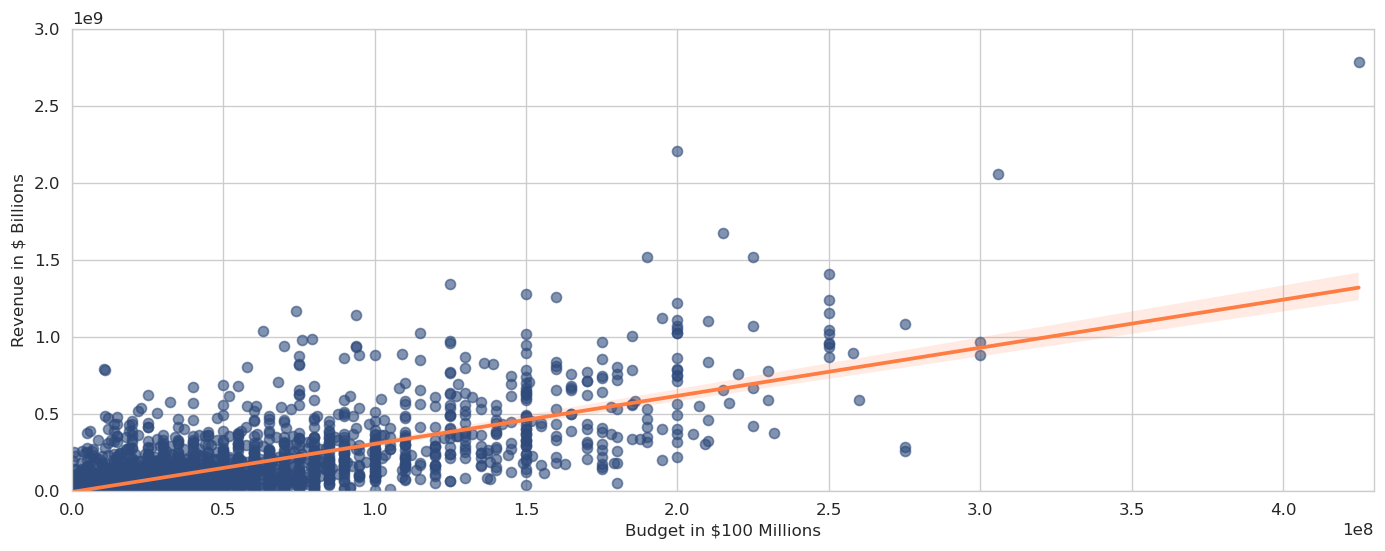

In [70]:
plt.figure(figsize=(14, 5),  dpi=120)
with sns.axes_style("whitegrid"):
    ax = sns.regplot(data=new_film,
                     x="USD_Production_Budget",
                     y="USD_Worldwide_Gross",
                     color="#2f4b7c",
                     scatter_kws={"alpha":0.6},
                     line_kws={'color':'#ff7c43'});
    ax.set(xlim=(0, 430000000),
           ylim=(0, 3000000000),
           xlabel="Budget in $100 Millions",
           ylabel="Revenue in $ Billions");

In [72]:
lr = LinearRegression()

In [78]:
x = new_film[['USD_Production_Budget']]

In [79]:
y = new_film[["USD_Worldwide_Gross"]]

In [80]:
lr.fit(x, y)

LinearRegression()

In [81]:
# theta0
lr.intercept_

array([-8650768.00661024])

In [82]:
#theta1
lr.coef_

array([[3.12259592]])

In [83]:
lr.score(x, y)

0.5577032617720403

In [84]:
olr = LinearRegression()

In [85]:
oX = old_film[["USD_Production_Budget"]]
oY = old_film[["USD_Worldwide_Gross"]]

In [86]:
olr.fit(oX, oY)

LinearRegression()

In [87]:
olr.intercept_

array([22821538.63508038])

In [88]:
olr.coef_

array([[1.64771314]])

In [89]:
olr.score(oX, oY)

0.02937258620576877